In [2]:
all <- read.table("hw9t4v0.txt")
colnames(all) <- c('y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6')
all[1:10,]

y,x1,x2,x3,x4,x5,x6
0.000,9.824,0.148,2.465,2.170,1.976,51.270
0.000,14.043,0.156,3.654,1.177,1.991,93.413
0.000,4.031,0.141,4.156,1.443,1.967,19.066
0.000,6.227,0.148,2.988,1.006,0.786,36.017
0.000,10.066,0.133,2.635,1.032,1.753,48.501
0.000,12.145,0.188,3.659,1.622,1.913,71.442
0.016,6.832,0.180,3.966,2.863,1.158,31.152
0.000,10.094,0.117,2.309,1.868,1.669,53.962
0.001,0.211,0.180,2.711,1.489,1.218,2.804
0.165,13.320,0.164,1.922,1.021,1.717,70.923


In [3]:
n <- 400
q <- 100
train <- all[1:n,]
test <- all[400:500,]


После считывания данных и приведения их более-менее приемлимый вид, проведём отбор признаков

In [4]:
model <- lm(y ~ x1 + x2 + x3 + x4 + x5, data = train)
summary(model)



Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05304 -0.03369 -0.02453 -0.01174  0.75895 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.0046470  0.0310818   0.150   0.8812  
x1           0.0017717  0.0009238   1.918   0.0558 .
x2           0.1225043  0.1267663   0.966   0.3344  
x3           0.0023659  0.0044113   0.536   0.5920  
x4          -0.0069943  0.0062810  -1.114   0.2661  
x5          -0.0030622  0.0107356  -0.285   0.7756  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0848 on 394 degrees of freedom
Multiple R-squared:  0.01491,	Adjusted R-squared:  0.002408 
F-statistic: 1.193 on 5 and 394 DF,  p-value: 0.312


Второй, третий и пятый признаки не являеюся значимым для регресии, исключим их из модели

In [7]:
perfect_model <- lm(y ~ x1 + x4 , data = train)
summary(perfect_model)



Call:
lm(formula = y ~ x1 + x4, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.04711 -0.03316 -0.02492 -0.01418  0.75937 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.0247606  0.0125599   1.971   0.0494 *
x1           0.0017852  0.0009202   1.940   0.0531 .
x4          -0.0061633  0.0062217  -0.991   0.3225  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08461 on 397 degrees of freedom
Multiple R-squared:  0.01176,	Adjusted R-squared:  0.006781 
F-statistic: 2.362 on 2 and 397 DF,  p-value: 0.09554


In [8]:

prediction <- predict(perfect_model, newdata=test)
dev <- prediction - test$y
summary(dev)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.394800  0.011860  0.023720  0.002254  0.031230  0.045990 

Остатки маленькие, что показывает, что наша модел выбрана хорошо. посмотрим на них

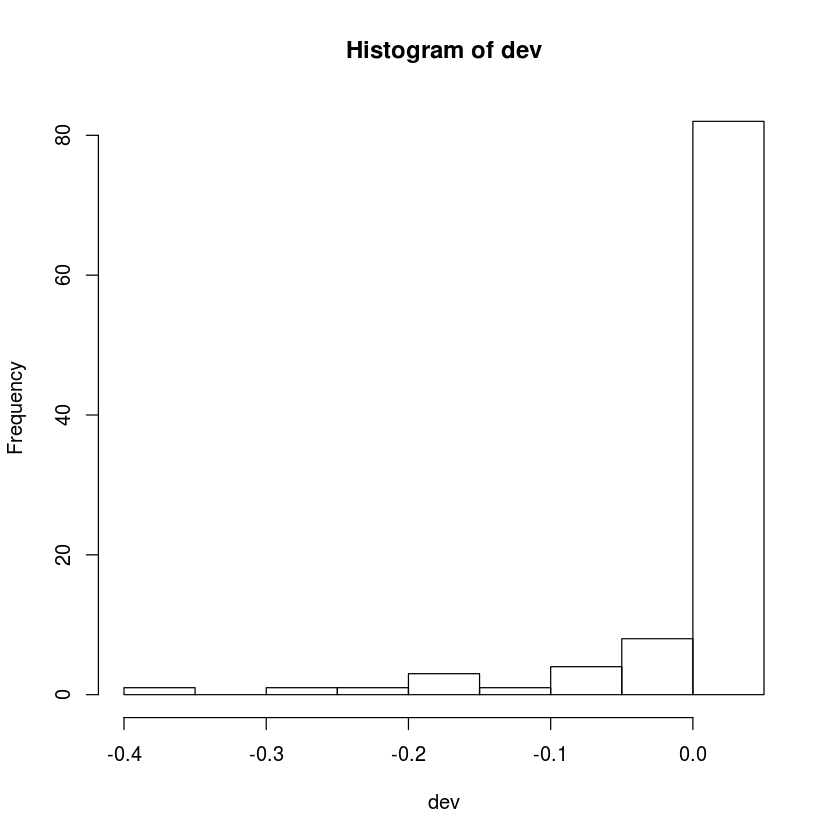

In [9]:
hist(dev)